<p style="text-align: center; font-size: 28px; font-weight: bold;">CIND 123</p>
<p style="text-align: center; font-size: 24px; font-weight: bold;">Data Analytics: Basic Methods</p>
<p style="text-align: center; font-size: 24px; font-weight: bold;">Assignment 3 (10%)</p>

**Yinghao Li**  
**CIND123 DHC 501342626**

<p style="text-align: center; font-size: 20px; font-weight: bold;">Instructions</p>
 
This assignment can be submitted using either Python or R, whichever you prefer.

- **If using R**, you must submit an RMD file with its knitted file (PDF or HTML). To learn more about knitting and R markdown, visit [R Markdown](http://rmarkdown.rstudio.com).
- **If using Python**, you must submit an IPYNB file and its exported PDF/HTML with clearly printed/shown answers.

Failing to submit both files ({RMD + knitted PDF/HTML} OR {IPYNB + PDF/HTML}) will be subject to a 30% mark deduction.

**NOTE:** IF YOU USE `R STUDIO`, YOU SHOULD NEVER HAVE `install.packages` IN YOUR CODE; OTHERWISE, THE `Knit` OPTION WILL RAISE AN ERROR. COMMENT OUT ALL PACKAGE INSTALLATIONS BUT KEEP `library()` CALLS.

**NOTE:** If you answer the questions in R, all your answers should be in R (ignore Python questions). If you answer the questions in Python, all your answers should be in Python (ignore R questions). You are not allowed to switch languages in this assignment.

<p style="font-size: 24px; font-weight: bold;">Question 1 (25 points)</p>

Midterm and final grades of some students are given as (87, 72, 80, 91, 85, 69, 40, 34, 61) and (59, 68, 52, 62, 78, 70, 35, 28, 45). Set variables `midterm` and `final` respectively. 

<p style="font-size: 20px; font-weight: bold;">Q1a (10 points)</p>

Find the least-squares line relating the final to the midterm.

Does the assumption of a linear relationship appear to be reasonable in this case? Give reasons to your answer as a comment.

In [6]:
# Code
import numpy as np
import matplotlib.pyplot as plt

midterm = np.array([87, 72, 80, 91, 85, 69, 40, 34, 61])
final = np.array([59, 68, 52, 62, 78, 70, 35, 28, 45])

midterm_mean = np.mean(midterm)
final_mean = np.mean(final)

numerator = np.sum((midterm-midterm_mean)*(final-final_mean))
denominator = np.sum((midterm-midterm_mean)**2)

slope = numerator/denominator
intercept = final_mean-(slope*midterm_mean)
print("slope: ", slope)
print("intercept", intercept)
print("least-squares line: ", "y=", slope, "*x", "+", intercept)

slope:  0.663579834180262
intercept 9.582675849157539
least-squares line:  y= 0.663579834180262 *x + 9.582675849157539


In [ ]:
# Comment
"""The assumption of a linear relationship appear to be reasonable in this case. As we can see in the linear function, there exists an obvious positive relationship
between the midterm grades and the final grades. The slope is 0.66."""

<p style="font-size: 20px; font-weight: bold;">Q1b (10 points)</p>

Plot the `final` as a function of the `midterm` using a scatterplot and graph the least-square line in red color on the same plot.

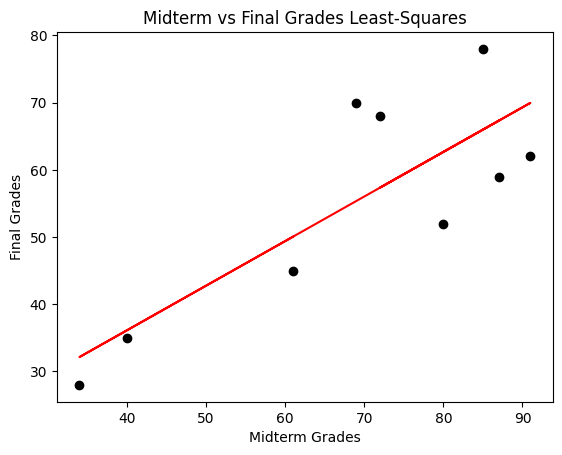

In [8]:
plt.scatter(midterm, final, color='black', label='Data Points')
plt.plot(midterm, slope*midterm + intercept, color='red', label='Least-Squares Line')
plt.xlabel('Midterm Grades')
plt.ylabel('Final Grades')
plt.title('Midterm vs Final Grades Least-Squares')
plt.show()

<p style="font-size: 20px; font-weight: bold;">Q1c (5 points)</p>

Use the regression line to predict the final grades when the midterm grades are 82 and 32.

In [9]:
y_82 = intercept+slope*82
y_32 = intercept+slope*32
print(y_82)
print(y_32)

63.996222251939024
30.817230542925923


<p style="font-size: 24px; font-weight: bold;">Question 2 (60 points)</p>

This question makes use of package `plm` in `R`. Please load Crime dataset as follows:

In [ ]:
# install.packages("plm")
library(plm) 
data(Crime)

In Python, you can load the `crime.csv` file attached to the assignment.

<p style="font-size: 20px; font-weight: bold;">Q2a (5 points)</p>

Display the first 7 rows of `crime` data and display the names of all the variables, the number of variables, then display a descriptive summary of each variable.

In [34]:
import pandas as pd

crime_path = "D:\Ryerson Big Data Certificate\CIND123-Data Analytics Basic Methods\Assignment3\crime.csv"

df = pd.read_csv(crime_path)
print(df.head(7))
print("To display the names of all the variables: ", df.columns, sep='\n')
num_columns = df.shape[1]
print("To display the number of columns: ", num_columns, sep='\n')
print("To display a descriptive summary of each variable", df.describe(include='all'), sep='\n')


   Unnamed: 0  county  year    crmrte    prbarr   prbconv   prbpris  avgsen  \
0           1       1    81  0.039885  0.289696  0.402062  0.472222    5.61   
1           2       1    82  0.038345  0.338111  0.433005  0.506993    5.59   
2           3       1    83  0.030305  0.330449  0.525703  0.479705    5.80   
3           4       1    84  0.034726  0.362525  0.604706  0.520104    6.89   
4           5       1    85  0.036573  0.325395  0.578723  0.497059    6.55   
5           6       1    86  0.034752  0.326062  0.512324  0.439863    6.90   
6           7       1    87  0.035604  0.298270  0.527596  0.436170    6.71   

      polpc   density  ...     lwfir     lwser     lwmfg     lwfed     lwsta  \
0  0.001787  2.307159  ...  5.607452  5.374044  5.434246  6.014619  5.464848   
1  0.001767  2.330254  ...  5.706707  5.444911  5.482013  6.039540  5.536862   
2  0.001836  2.341801  ...  5.736475  5.481292  5.597310  6.084157  5.522900   
3  0.001886  2.346420  ...  5.858180  5.531204 


<p style="font-size: 20px; font-weight: bold;">Q2b (5 points)</p>

Calculate the mean,variance and standard deviation of probability of conviction (`prbconv`) by omitting the missing values, if any.

In [44]:
df_prbconv = df['prbconv'].dropna()

df_prbconv_mean = df_prbconv.mean()
df_prbconv_var = df_prbconv.var()
df_prbconv_std = df_prbconv.std()

print("mean: ",df_prbconv_mean)
print("variance: ", df_prbconv_var)
print("standard deviation: ", df_prbconv_std)

mean:  0.6886176509523809
variance:  2.8572654474341377
standard deviation:  1.6903447717652567



<p style="font-size: 20px; font-weight: bold;">Q2c (10 points)</p>

Use `lpolpc` (log-police per capita) and `smsa` variables to build a linear regression model to predict probability of conviction (`prbconv`). And, compare with another linear regression model that uses `polpc` (police per capita) and `smsa`.

In [84]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv(crime_path)
df = df.dropna(subset=['prbconv', 'lpolpc', 'polpc', 'smsa'])

df['smsa'] = df['smsa'].map({'yes': 1, 'no': 0})

y = df['prbconv']
X1 = df[['lpolpc', 'smsa']]
X2 = df[['polpc', 'smsa']]

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y, test_size=0.2, random_state=42)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.2, random_state=42)

# Train the first model
model1 = LinearRegression()
model1.fit(X1_train, y1_train)
y_pred1 = model1.predict(X1_test)
mse1 = mean_squared_error(y1_test, y_pred1)
r2_1 = r2_score(y1_test, y_pred1)

# train the second model
model2 = LinearRegression()
model2.fit(X2_train, y2_train)
y_pred2 = model2.predict(X2_test)
mse2 = mean_squared_error(y2_test, y_pred2)
r2_2 = r2_score(y2_test, y_pred2)

print("Model1 Mean Squared Error:", mse1)
print("Model1 R**2 Error: ", r2_1)

print("Model2 Mean Squared Error:", mse2)
print("Model2 R**2 Error: ", r2_2)

Model1 Mean Squared Error: 1.403902471899701
Model1 R**2 Error:  0.1879993093964557
Model2 Mean Squared Error: 1.2953047441374619
Model2 R**2 Error:  0.2508109588564005


<p style="font-size: 20px; font-weight: bold;">Q2d (10 points)</p>

How can you draw a conclusion from the results? (Note: Full marks requires comment on the predictors)

In [ ]:
"""The Mean squared error for model 2 is smaller than model 1, which means the predictions made by model 2 are more conscise than model 1.
   A lower mean squared error indicates a better fit of the model to the data.
   The R**2 of model 2 is higher than model 1, which means model 2 explains a greater proportion of the variance in the dependent variable.
"""

<p style="font-size: 20px; font-weight: bold;">Q2e (10 points)</p>

Based on the output of your model, predict the output for different factors of `smsa` when `polpc` is set to 0.0025. Use both the `predict` function and manual intercept and slope equations and compare the results.

In [98]:
input_data = pd.DataFrame({
    'polpc': [0.0025, 0.0025],
    'smsa': ['yes', 'no']
})

input_data = pd.get_dummies(input_data, drop_first=True)
input_data = input_data.reindex(columns=['polpc', 'smsa'], fill_value=0)
print(input_data)

predictions = model2.predict(input_data)
print(predictions)

intercept = model2.intercept_
coefficients = model2.coef_
print("intercept: ", intercept)
print("coefficients: ", coefficients)

# manual calculations, y=b0+b1*x1+b2*x2
polpc_value = 0.0025
smsa_yes = 1
manual_prediction_yes = intercept + coefficients[0]*polpc_value + coefficients[1]*smsa_yes

smsa_no = 0
manual_prediction_no = intercept + coefficients[0]*polpc_value + coefficients[1]*smsa_no

print("manual_prediction_yes: ", manual_prediction_yes)
print("manual_prediction_no: ", manual_prediction_no)

    polpc  smsa
0  0.0025     0
1  0.0025     0
[0.87441253 0.87441253]
intercept:  0.21292788170596133
coefficients:  [264.59386097  -0.43844014]
manual_prediction_yes:  0.4359723915019734
manual_prediction_no:  0.8744125341186665


<p style="font-size: 20px; font-weight: bold;">Q2f (10 points)</p>

Find Pearson correlation between probability of prison sentence `prbpris` and tax per capita `taxpc`; and also Pearson correlation between probability of conviction `prbconv` and probability of arrest `prbarr`.

In [5]:
import pandas as pd
from scipy.stats import pearsonr

crime_path = "D:\Ryerson Big Data Certificate\CIND123-Data Analytics Basic Methods\Assignment3\crime.csv"

df = pd.read_csv(crime_path)
data = df.dropna()

data['prbpris'] = pd.to_numeric(data['prbpris'], errors='coerce')
data['taxpc'] = pd.to_numeric(data['taxpc'], errors='coerce')
data['prbconv'] = pd.to_numeric(data['prbconv'], errors='coerce')
data['prbarr'] = pd.to_numeric(data['prbarr'], errors='coerce')

prbpris_taxpc, _ = pearsonr(data['prbpris'], data['taxpc'])
prbconv_prbarr, _ = pearsonr(data['prbconv'], data['prbarr'])

print("prbpris_taxpc", prbpris_taxpc)
print("prbconv_prbarr", prbconv_prbarr)


prbpris_taxpc -0.11206309870101797
prbconv_prbarr 0.03556890262294847


What conclusions can you draw? Write your reasons as comments.

In [ ]:
"""
The prbpris and taxpc correlation is -0.112, which indicates a very weak negative relationship. This means the tax per capita
will sightly decrease when the probability of receving a prison sentence increase.
The prbconv and prbarr correlation is 0.0355, which indicates a weak positive relationship. This means the probability of convintion
will slightly increase when the probability of arrest slightly increase.
"""

<p style="font-size: 20px; font-weight: bold;">Q2g (10 points)</p>

Display the correlation matrix of the variables: `prbconv`, `prbpris`, `density`, `polpc`.

In [7]:
df = pd.read_csv(crime_path)
data = df[['prbconv', 'prbpris', 'density', 'polpc']].apply(pd.to_numeric, errors='coerce')
data = data.dropna()
matrix = data.corr()
print(matrix)

          prbconv   prbpris   density     polpc
prbconv  1.000000 -0.037340 -0.115555  0.449635
prbpris -0.037340  1.000000  0.164663 -0.057452
density -0.115555  0.164663  1.000000 -0.039696
polpc    0.449635 -0.057452 -0.039696  1.000000


Write what conclusion you can draw, as comments.

In [ ]:
"""
The probality between prbpris and prbconv is -0.03734, indicating a very slight negative correlation.
The probality between density and prbconv is -0.1155, indicating a very slight negative correlation.
The probality between polpc and prbconv is 0.4496, indicating a slight positive correlation.
The probality between density and prbpris is 0.1646, indicating a slight positive correlation.
The probability between polpc and prbpris is -0.057, indicating a very slight negative correlation.
The probability between polpc and density is -0.0396, indicating a very slight negative correlation.
"""

<p style="font-size: 24px; font-weight: bold;">Question 3 (15 points)</p>

Many times in data analysis, we need a method that relies on repeated random sampling to obtain numerical results. The underlying concept is to use randomness to solve problems. In fact, this is a mathematical technique, which is used to estimate the possible outcomes of an uncertain event and is called the `Monte Carlo` Method.

Consider that We roll a die 10 times and we want to know the probability of getting more than 3 times of even numbers. This is a problem for the Binomial distribution, but suppose we don’t know anything about Binomial distribution. We can easily solve this problem with a Monte Carlo Simulation.


<p style="font-size: 20px; font-weight: bold;">Q3a (5 points)</p>

The Monte Carlo Method uses random numbers to simulate some process. Here the process is rolling a die 20 times. Assume the die is fair. What is the probability of success or getting an even number in rolling the die once?

In [10]:
import random

num_simulations = 10000
num_rolls = 20
event_count_success = 0

for _ in range(num_simulations):
    even_count = 0
    for _ in range(num_rolls):
        roll = random.randint(1, 6)
        if roll%2 == 0:
            even_count += 1
    
    if even_count > 3:
        event_count_success += 1

probability = event_count_success/num_simulations
print("Monte Carlo Simulation probability: ", probability)

# Use Binomial Distribution to verify this
import scipy.stats as stats

n = 20
p = 0.5

prob_more_than_3 = 1 - stats.binom.cdf(3, n, p)
print("Binomial Distribution probability: ", prob_more_than_3)

Monte Carlo Simulation probability:  0.9985
Binomial Distribution probability:  0.9987115859985352


<p style="font-size: 20px; font-weight: bold;">Q3b (10 points)</p>

Define a function named one.trial, that simulates a single round of rolling a die 20 times and returns true if the number of even numbers is > 5.

In [12]:
import random

def one_trail():
    even_count = 0

    for _ in range(20):
        roll = random.randint(1, 6)
        if roll%2 == 0:
            even_count += 1
    return even_count > 5

result = one_trail()
print(result)

True
